# Import Data

In [1]:
import pandas as pd
import time
import numpy as np
import requests
url = 'https://github.com/cshen6/GraphNN/blob/main/Data/EU-EMAIL-CORE/Labels.xlsx?raw=true'
s = requests.get(url).content
df = pd.read_excel (s,header = None)
print (df)

       0
0      1
1      1
2     21
3     21
4     21
...   ..
1000   4
1001  21
1002   1
1003   6
1004  22

[1005 rows x 1 columns]


In [2]:
y = df.to_numpy()
y

array([[ 1],
       [ 1],
       [21],
       ...,
       [ 1],
       [ 6],
       [22]])

In [3]:
url2 = 'https://github.com/cshen6/GraphNN/blob/main/Data/EU-EMAIL-CORE/Core.xlsx?raw=true'
df2 = pd.read_excel (url2,header = None)
print (df2)

         0    1
0        0    1
1        2    3
2        2    4
3        5    6
4        5    7
...    ...  ...
25566  420  143
25567  174  859
25568  440  460
25569   52  786
25570  506  932

[25571 rows x 2 columns]


In [4]:
Edge = df2.to_numpy()
Edge

array([[  0,   1],
       [  2,   3],
       [  2,   4],
       ...,
       [440, 460],
       [ 52, 786],
       [506, 932]])

In [5]:
A = np.zeros((1005,1005))
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
for i in range (0,25571):
    A[Edge[i,0],Edge[i,1]]=1
A

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split Data

In [7]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=5)
for train_index, test_index in rkf.split(A):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = A[train_index], A[test_index]
     y_train, y_test = y[train_index], y[test_index]

TRAIN: [   0    1    2    4    5    6    7    8    9   10   13   14   15   16
   17   18   19   20   21   22   24   25   26   27   29   30   31   32
   34   36   37   38   39   40   41   42   43   44   45   46   47   48
   49   50   51   52   53   54   55   56   58   61   62   63   64   65
   66   67   68   69   70   71   73   74   75   76   77   78   79   80
   81   82   83   84   86   87   88   89   90   91   92   93   94   95
   96   98   99  100  101  102  103  105  107  108  109  110  111  112
  113  114  115  116  118  119  120  122  123  124  125  127  128  129
  130  132  134  135  136  137  139  140  141  142  143  144  145  146
  147  149  150  151  152  153  154  155  156  157  158  160  161  162
  163  164  165  167  168  169  170  171  172  173  174  175  177  178
  179  180  181  182  183  184  185  186  187  188  189  190  191  192
  194  196  197  199  200  202  204  205  206  208  209  210  211  213
  214  215  216  217  218  219  220  221  222  223  224  225  226  227

  999 1000 1001 1002 1003 1004] TEST: [  0   7  13  22  39  52  58  62  65  75  76  77  83  95  99 114 121 122
 125 134 135 137 146 149 151 157 163 173 176 177 179 183 185 187 194 195
 199 204 207 208 216 225 227 231 233 236 244 259 260 266 276 282 285 288
 290 296 298 301 302 305 308 309 316 322 327 337 345 348 353 366 383 388
 392 394 402 403 413 414 415 416 418 423 426 438 447 451 452 454 458 461
 463 469 471 478 479 484 487 490 500 502 506 517 518 532 542 543 547 558
 559 562 563 570 578 582 584 588 589 591 594 596 603 605 609 615 617 618
 631 638 648 649 650 654 657 659 663 665 671 674 676 678 682 687 695 697
 708 714 715 723 724 726 727 733 741 744 746 749 756 757 760 761 770 775
 776 781 791 801 819 828 845 848 857 861 864 866 867 871 872 874 878 880
 885 888 895 905 906 907 921 922 928 934 942 944 946 947 963 977 982 986
 988 991 992]
TRAIN: [   0    1    2    5    6    7    9   10   13   16   18   19   20   21
   22   24   25   26   27   29   30   31   32   33   34   36   37  

In [8]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=5)
for train_index, test_index in rkf.split(A):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = A[train_index], A[test_index]
     y_train, y_test = y[train_index], y[test_index]
     X1 = X_train.transpose()
     X_train, X_test = X1[train_index], X1[test_index]

TRAIN: [   0    1    2    4    5    6    7    8    9   10   13   14   15   16
   17   18   19   20   21   22   24   25   26   27   29   30   31   32
   34   36   37   38   39   40   41   42   43   44   45   46   47   48
   49   50   51   52   53   54   55   56   58   61   62   63   64   65
   66   67   68   69   70   71   73   74   75   76   77   78   79   80
   81   82   83   84   86   87   88   89   90   91   92   93   94   95
   96   98   99  100  101  102  103  105  107  108  109  110  111  112
  113  114  115  116  118  119  120  122  123  124  125  127  128  129
  130  132  134  135  136  137  139  140  141  142  143  144  145  146
  147  149  150  151  152  153  154  155  156  157  158  160  161  162
  163  164  165  167  168  169  170  171  172  173  174  175  177  178
  179  180  181  182  183  184  185  186  187  188  189  190  191  192
  194  196  197  199  200  202  204  205  206  208  209  210  211  213
  214  215  216  217  218  219  220  221  222  223  224  225  226  227

TRAIN: [   1    2    3    4    6    7    8    9   10   11   13   14   15   16
   17   18   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   39   41   43   44   45   46   48   49
   50   52   54   55   56   57   59   60   61   62   63   64   65   66
   67   69   70   71   72   73   74   75   77   78   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   98
   99  100  101  102  103  104  106  107  108  110  112  113  114  116
  117  118  119  120  121  122  123  124  125  126  127  128  129  130
  131  132  134  135  136  137  138  139  140  141  142  144  145  147
  149  150  151  152  153  155  156  157  158  164  165  166  167  168
  169  172  173  175  176  179  180  184  185  187  188  189  190  191
  192  193  196  197  198  199  200  201  202  203  205  207  208  210
  211  212  213  215  216  217  218  220  221  222  224  226  229  233
  234  235  236  238  240  241  242  243  244  246  247  248  249  250

  996  997  998  999 1000 1001] TEST: [   2    4   15   26   32   39   41   49   54   59   60   61   62   65
   67   69   82   84   86   91  101  102  104  106  108  113  138  142
  149  150  152  173  176  185  187  190  191  198  202  210  211  212
  216  218  220  224  226  240  244  246  248  250  251  255  256  262
  264  265  266  267  268  269  272  277  288  292  295  305  307  310
  315  316  317  318  325  329  333  335  336  347  369  378  380  387
  409  411  413  423  424  426  430  432  435  442  443  448  449  453
  457  461  462  476  482  487  494  495  497  499  504  508  515  516
  517  521  522  535  537  538  546  547  549  555  561  569  573  574
  575  581  588  591  595  606  611  613  616  625  627  640  646  654
  659  665  681  692  693  694  697  700  704  707  712  714  719  730
  733  735  739  741  743  759  760  762  765  769  778  781  783  802
  803  806  809  824  826  834  850  853  854  855  861  868  871  877
  883  887  892  895  898  908  917  93

TRAIN: [   0    1    2    4    7    8    9   10   11   12   13   14   15   16
   18   19   20   21   22   24   25   26   27   28   29   30   31   32
   33   34   35   36   37   38   40   41   43   44   45   46   49   50
   52   54   55   56   57   58   59   60   61   65   66   67   68   69
   70   72   73   74   75   76   77   78   79   80   84   85   86   87
   88   89   91   92   93   95   99  103  105  107  109  110  111  112
  113  114  115  116  117  118  121  123  124  125  126  127  129  130
  132  133  134  135  136  138  139  141  142  143  144  145  146  148
  149  150  151  152  153  154  155  156  157  158  159  160  161  162
  163  164  165  166  167  170  171  173  174  177  178  179  180  181
  182  183  185  186  187  189  190  194  195  196  197  198  200  201
  202  203  204  206  207  209  210  211  212  213  214  215  217  218
  219  221  222  223  224  225  226  227  228  229  230  231  234  235
  236  237  238  239  240  241  242  243  244  246  248  249  250  251

TRAIN: [   1    2    3    5    6    9   10   11   12   13   15   16   17   19
   20   21   22   24   25   26   27   30   31   32   33   35   36   37
   38   43   44   46   47   48   50   52   54   55   56   57   58   59
   60   61   62   63   64   65   66   70   72   73   74   75   76   77
   78   79   80   81   82   83   84   85   86   87   90   91   92   94
   95   96   98  102  103  104  105  106  107  109  110  112  114  115
  116  118  119  120  121  122  123  124  125  126  127  128  129  130
  131  132  133  134  135  136  137  138  139  140  141  142  143  144
  145  146  147  148  149  150  151  152  153  154  156  158  159  160
  161  162  163  165  166  167  168  169  170  171  172  174  177  178
  180  181  182  183  186  189  190  193  194  195  197  199  200  201
  202  203  204  205  206  207  209  211  212  213  214  215  216  218
  219  220  221  222  223  224  225  226  227  230  231  234  235  236
  237  239  240  241  242  243  244  246  247  249  250  252  253  254

In [9]:
X_train.shape,X_test.shape

((804, 804), (201, 804))

# LDA(A,y)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
begin = time.time()
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train.ravel())
LDAacc = clf.score(X_test, y_test)
print(LDAacc)
time.sleep(1) 
end = time.time()
print(f"Total runtime of the program is {end - begin}")

0.24378109452736318
Total runtime of the program is 1.51652193069458


# SVD with LDA

In [11]:
from scipy import linalg
begin1 = time.time()
U, s, VT = linalg.svd(A)
newx=[]
for c in range(1,30) :
   newx.append(U[:,0:c]*s[0:c]**0.5)
clf2 = LinearDiscriminantAnalysis()
SVDaccuracy=[]
for i in range(0,29):
    clf.fit(newx[i], y.ravel())
    SVDaccuracy.append(clf.score(newx[i], y.ravel()))
print(SVDaccuracy)
time.sleep(2) 
end1 = time.time()
print(f"Total runtime of the program is {end1 - begin1}")

[0.11741293532338308, 0.1562189054726368, 0.24477611940298508, 0.23781094527363184, 0.2796019900497512, 0.3194029850746269, 0.35124378109452736, 0.37412935323383084, 0.4, 0.41691542288557215, 0.45174129353233833, 0.4606965174129353, 0.4766169154228856, 0.4945273631840796, 0.5034825870646766, 0.5094527363184079, 0.5164179104477612, 0.5233830845771145, 0.5313432835820896, 0.5373134328358209, 0.5472636815920398, 0.5562189054726369, 0.5592039800995025, 0.5592039800995025, 0.5611940298507463, 0.5651741293532339, 0.5661691542288557, 0.5691542288557214, 0.5701492537313433]
Total runtime of the program is 3.1174471378326416


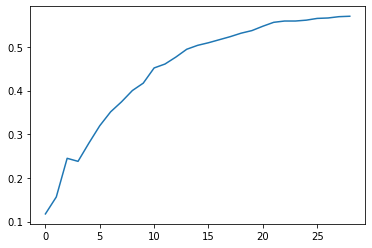

In [12]:
import matplotlib.pyplot as plt
plt.plot(SVDaccuracy)

# MLP(z,y)

In [13]:
w = np.zeros((804,42))
for x in range(0,804):
    i=int(y_train[x])
    w[x][i]=1
w

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
z_train=np.matmul(X_train,w)
z_train

array([[ 1., 14.,  0., ...,  0.,  0.,  0.],
       [ 2., 14.,  0., ...,  1.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
z_test = np.matmul(X_test,w)
z_test,z_test.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [2., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (201, 42))

In [16]:
from sklearn.neural_network import MLPClassifier
begin2 = time.time()
clf3 = MLPClassifier(random_state=2, max_iter=1000)
clf3.fit(z_train, y_train.ravel())
ZYAcc = clf3.score(z_test, y_test)
print(ZYAcc)
time.sleep(3) 
end2 = time.time()
print(f"Total runtime of the program is {end2 - begin2}")

0.7263681592039801
Total runtime of the program is 5.979867935180664


# LDA(z,y)

In [17]:
begin3 = time.time()
clf4 = LinearDiscriminantAnalysis()
clf4.fit(z_train,y_train.ravel())
ZYLDA = clf4.score(z_test, y_test.ravel())
print(ZYLDA)
time.sleep(4) 
end3 = time.time()
print(f"Total runtime of the program is {end3 - begin3}")

0.6716417910447762
Total runtime of the program is 4.025666952133179
